In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import pie, axis, show
import numpy as np

In [3]:
data = pd.read_csv("./CandidateData.csv")

In [4]:
data.head()

,Name,Constituency,Party,Cases,Education,Assets,Liabilities
0,Parmar Vijay,RAJKOT,BSP,4,12th Pass,"5,35,000",0
1,A M Ariff,ALAPPUZHA,CPI(M),2,Graduate Professional,"1,52,68,906","22,20,700"
2,A Narayanaswamy,CHITRADURGA,BJP,0,Graduate,"9,61,97,642",0
3,A Natarajan,COIMBATORE,IND,0,5th Pass,"7,000",0
4,A Pradeep Kumar,KOZHIKODE,CPI(M),1,12th Pass,"1,19,15,342","20,79,872"


In [5]:
data.info

<bound method DataFrame.info of                                  Name       Constituency  \
0                        Parmar Vijay             RAJKOT   
1                           A M Ariff          ALAPPUZHA   
2                     A Narayanaswamy        CHITRADURGA   
3                         A Natarajan         COIMBATORE   
4                     A Pradeep Kumar          KOZHIKODE   
5                   A T Dadakhalandar         DAVANAGERE   
6               A. Beemarao Milinther            VELLORE   
7                      A. Christhuraj  BANGALORE CENTRAL   
8                          A. Devadas            BELLARY   
9                       A. Habeebulla            VELLORE   
10                  A. Hafeez A. Aziz           BULDHANA   
11                         A. Hemanth           CHITTOOR   
12                        A. J. Patel           MAHESANA   
13                        A. Jayamani          CUDDALORE   
14                      A. Manikandan          CUDDALORE   
15      

In [6]:
data.describe

<bound method NDFrame.describe of                                  Name       Constituency  \
0                        Parmar Vijay             RAJKOT   
1                           A M Ariff          ALAPPUZHA   
2                     A Narayanaswamy        CHITRADURGA   
3                         A Natarajan         COIMBATORE   
4                     A Pradeep Kumar          KOZHIKODE   
5                   A T Dadakhalandar         DAVANAGERE   
6               A. Beemarao Milinther            VELLORE   
7                      A. Christhuraj  BANGALORE CENTRAL   
8                          A. Devadas            BELLARY   
9                       A. Habeebulla            VELLORE   
10                  A. Hafeez A. Aziz           BULDHANA   
11                         A. Hemanth           CHITTOOR   
12                        A. J. Patel           MAHESANA   
13                        A. Jayamani          CUDDALORE   
14                      A. Manikandan          CUDDALORE   
15    

In [7]:
type(data['Cases'])

pandas.core.series.Series

In [8]:
mostCriminalCases = data.sort_values(by=['Cases'], ascending=False).head(10)

In [9]:
mostCriminalCases.to_csv("MostCriminalCases.csv", index=False)

In [10]:
indicesToDrop = []
for ix in range(len(data)):
    if(data.iloc[ix]['Cases']==0):
        indicesToDrop.append(ix)

In [11]:
data.drop(data.index[indicesToDrop], inplace=True)

In [12]:
data = data.reset_index()

In [13]:
data.head()

,index,Name,Constituency,Party,Cases,Education,Assets,Liabilities
0,0,Parmar Vijay,RAJKOT,BSP,4,12th Pass,"5,35,000",0
1,1,A M Ariff,ALAPPUZHA,CPI(M),2,Graduate Professional,"1,52,68,906","22,20,700"
2,4,A Pradeep Kumar,KOZHIKODE,CPI(M),1,12th Pass,"1,19,15,342","20,79,872"
3,16,A. Raja,NILGIRIS,DMK,6,Graduate Professional,"4,95,91,024","14,24,914"
4,24,A.K. Moorthy,ARAKKONAM,Pattali Makkal Katchi,6,Post Graduate,"4,60,23,417","77,10,578"


In [113]:
data = pd.read_csv("./PartyAndCriminalCandidates.csv")

In [28]:
sums = data.Cases.groupby(data.Party).sum()

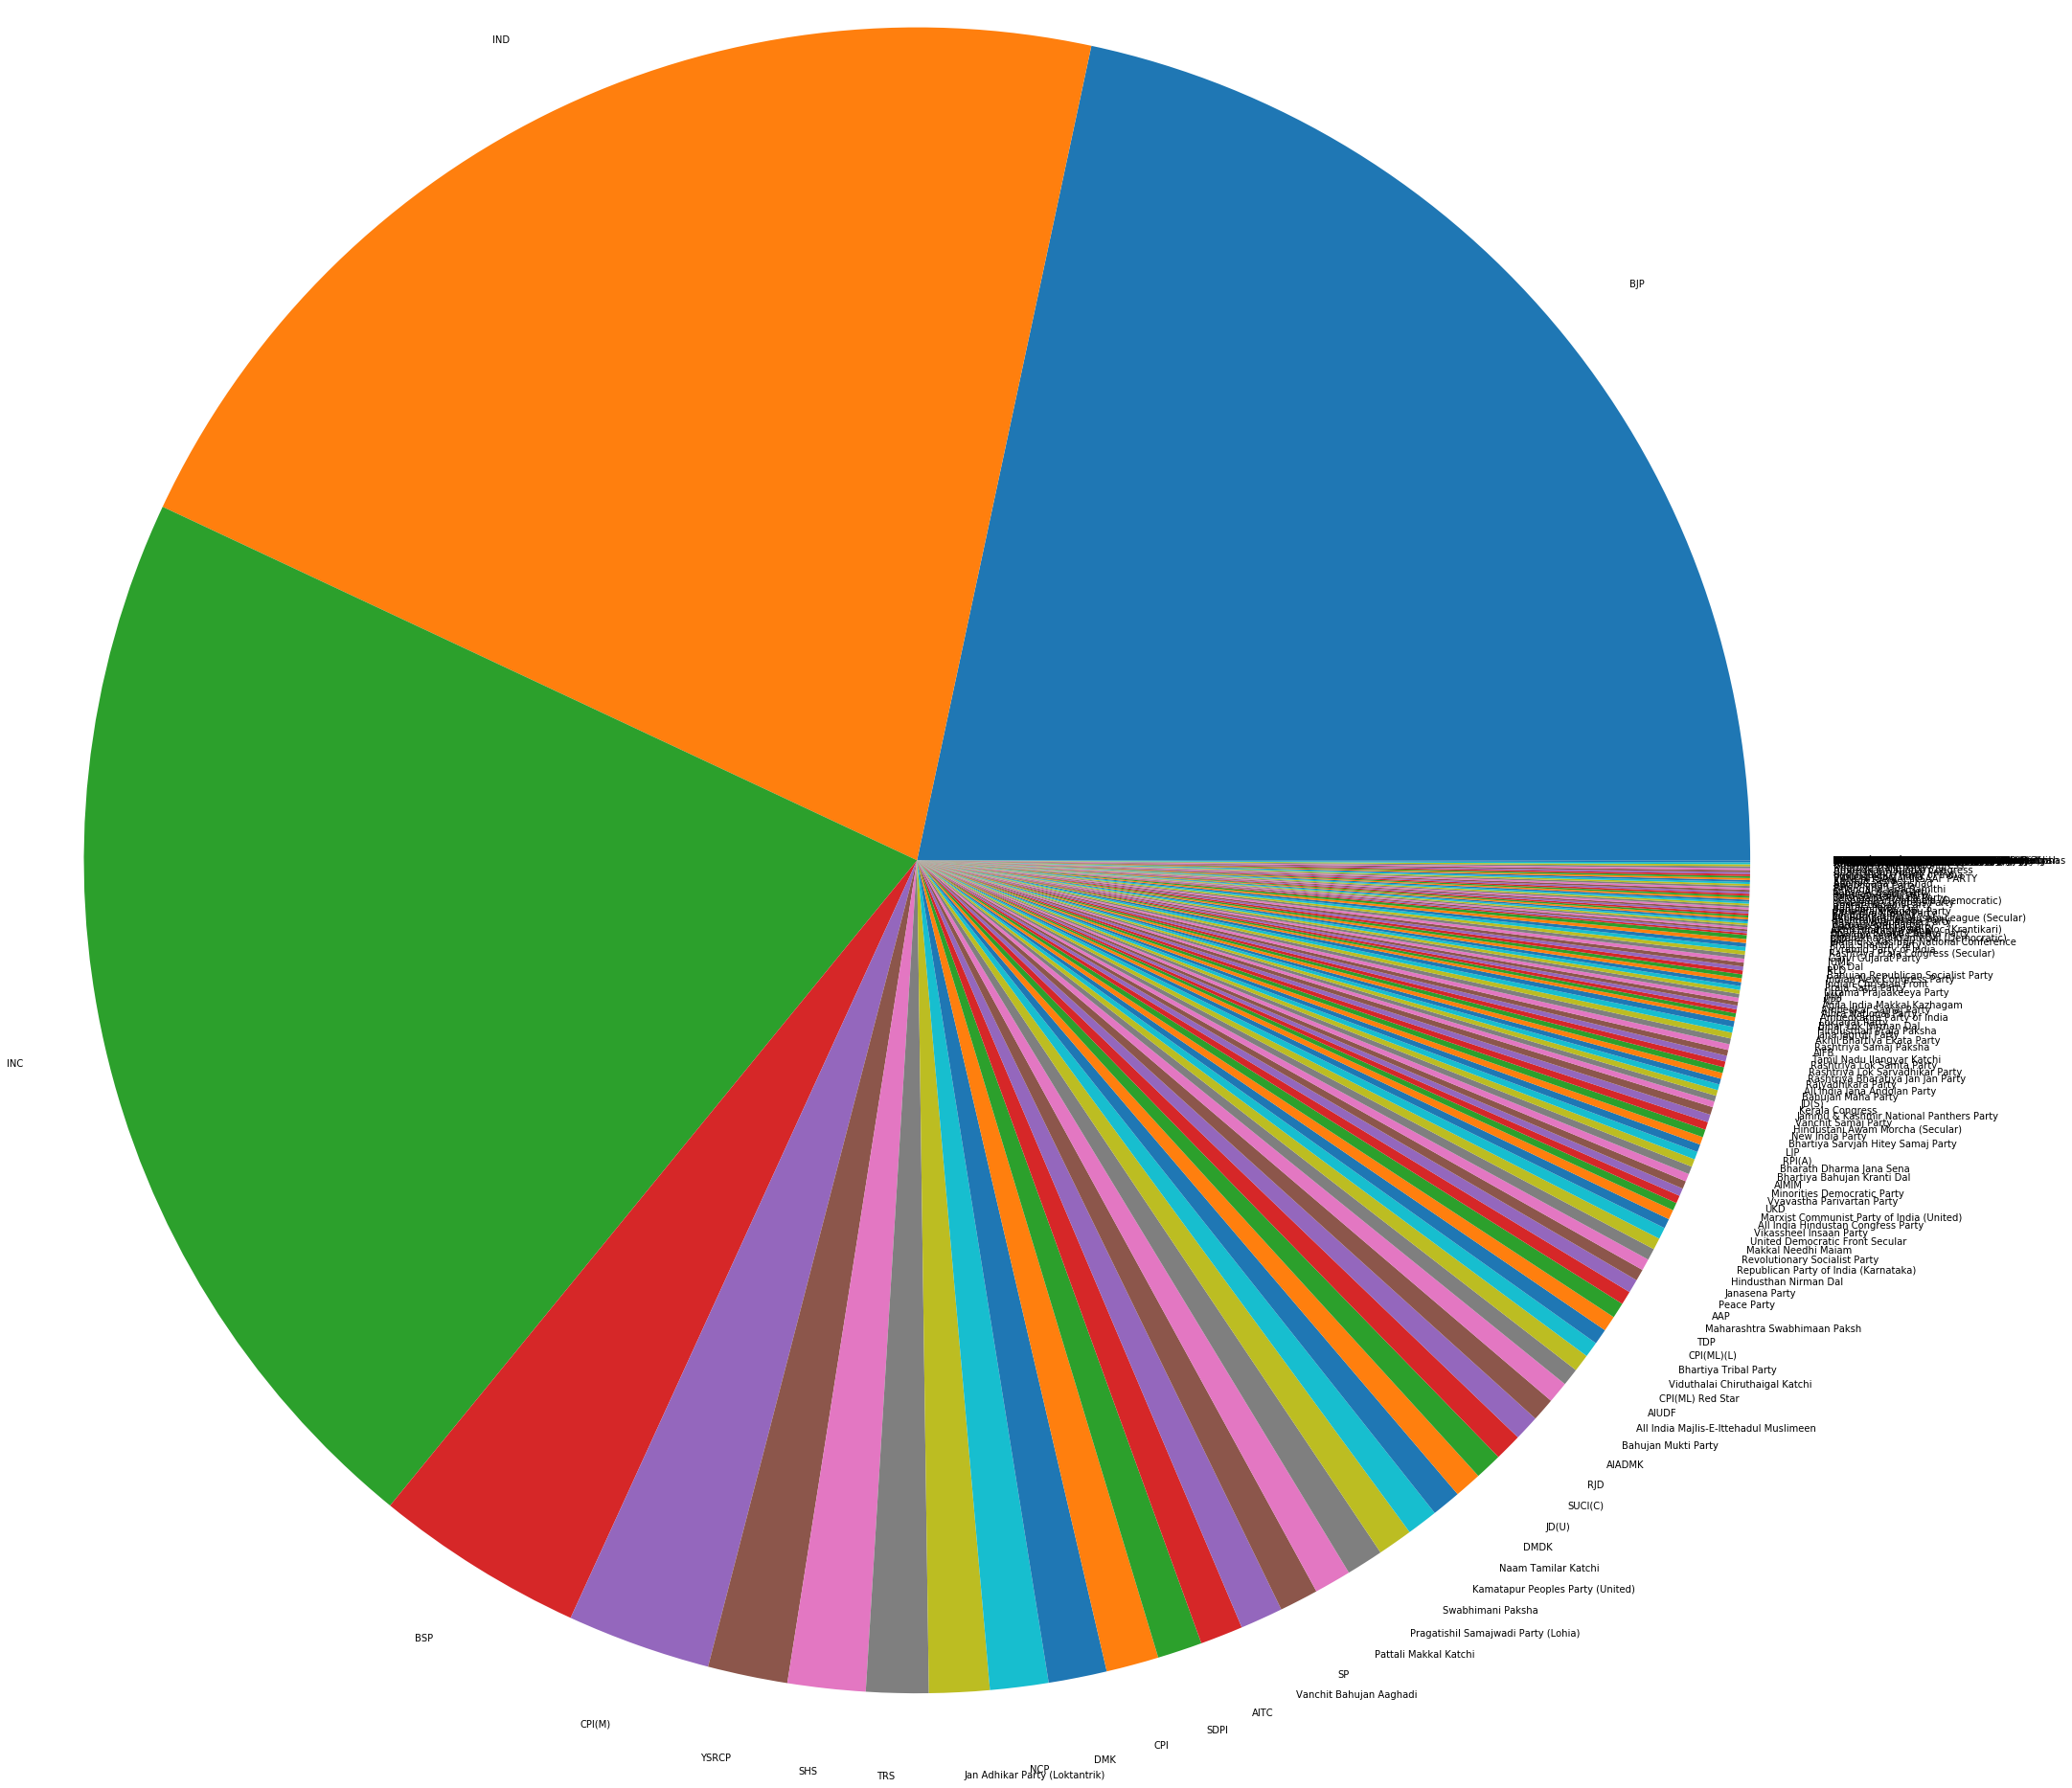

In [38]:
sums = sums.sort_values(ascending=False)
axis('equal');
pie(sums, labels=sums.index, radius=10);
show()

In [48]:
nd = data.groupby('Party')

In [56]:
nd = nd.count()

In [61]:
nd.to_csv("Parties.csv")

In [115]:
data = pd.read_csv("./CandidateData.csv")

In [128]:
parties = {}
for ix in range(len(data)):
    parties[data.iloc[ix].Party] = 0
crimcans = dict(parties)
partyPerc = dict(parties)
for ix in range(len(data)):
    parties[data.iloc[ix].Party] += 1
for ix in range(len(data)):
    if(data.iloc[ix].Cases>0):
        crimcans[data.iloc[ix].Party] += 1     

In [132]:
for ix in partyPerc:
    partyPerc[ix] = crimcans[ix]*100/parties[ix]

In [137]:
partyPerc

{'AAP': 25.0,
 'AIADMK': 13.636363636363637,
 'AIFB': 14.285714285714286,
 'AIMIM': 100.0,
 'AITC': 36.36363636363637,
 'AIUDF': 66.66666666666667,
 'Aadarsh Mithila Party': 50.0,
 'Aam Adhikar Morcha': 0.0,
 'Aam Janta Party (India)': 0.0,
 'Aam Janta Party Rashtriya': 0.0,
 'Aapki Apni Party (Peoples)': 0.0,
 'Aasra Lokmanch Party': 0.0,
 'Adarsh Samaj Party': 0.0,
 'Adhikar Vikas Party': 0.0,
 'Agila India Makkal Kazhagam': 25.0,
 'Ahimsa Socialist Party': 0.0,
 'Aihra National Party': 50.0,
 'Akhand Hind Party': 0.0,
 'Akhand Samaj Party': 0.0,
 'Akhil Bharat Hindu Mahasabha': 0.0,
 'Akhil Bharatiya Jan Sangh': 0.0,
 'Akhil Bharatiya Manavata Paksha': 0.0,
 'Akhil Bharatiya Muslim League (Secular)': 50.0,
 'Akhil Bharatiya Sena': 100.0,
 'Akhil Bhartiya Ekata Party': 100.0,
 'Akhil Bhartiya Lok Dal': 0.0,
 'Akhil Bhartiya Sarvadharma Samaj Party': 0.0,
 'Akhil Hind Forward Bloc (Krantikari)': 100.0,
 'Akila India Vallalar Peravai': 0.0,
 'All India Hindustan Congress Party': 66.666